In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

from yahoo_fin.stock_info import get_data

In [2]:
lulu_df= get_data("lulu", start_date="12/04/2010", end_date="07/04/2022", index_as_date = False, interval="1d")
lulu_df

,date,open,high,low,close,adjclose,volume,ticker
0,2010-12-06,26.924999,27.809999,26.790001,27.629999,27.629999,2905800,LULU
1,2010-12-07,27.980000,28.059999,27.215000,27.465000,27.465000,2867000,LULU
2,2010-12-08,27.735001,27.875000,27.290001,27.850000,27.850000,5343800,LULU
3,2010-12-09,30.924999,33.330002,30.910000,31.780001,31.780001,21547200,LULU
4,2010-12-10,32.730000,34.625000,32.299999,34.349998,34.349998,11656400,LULU
...,...,...,...,...,...,...,...,...
2908,2022-06-27,295.119995,297.059998,284.230011,287.480011,287.480011,1010600,LULU
2909,2022-06-28,288.369995,294.059998,278.160004,278.559998,278.559998,939700,LULU
2910,2022-06-29,280.459991,286.459991,276.529999,282.980011,282.980011,819600,LULU
2911,2022-06-30,277.489990,279.829987,271.000000,272.609985,272.609985,1248200,LULU


In [3]:
print(lulu_df.describe())


              open         high          low        close     adjclose  \
count  2913.000000  2913.000000  2913.000000  2913.000000  2913.000000   
mean    133.079039   134.976334   131.000465   133.037686   133.037686   
std     113.982392   115.510271   112.105927   113.821680   113.821680   
min      26.924999    27.809999    26.790001    27.465000    27.465000   
25%      58.360001    59.099998    57.290001    58.240002    58.240002   
50%      69.660004    70.599998    68.660004    69.559998    69.559998   
75%     183.529999   185.119995   180.850006   183.500000   183.500000   
max     476.779999   485.829987   469.089996   477.910004   477.910004   

             volume  
count  2.913000e+03  
mean   2.484770e+06  
std    2.565483e+06  
min    3.974000e+05  
25%    1.323500e+06  
50%    1.864800e+06  
75%    2.800000e+06  
max    4.962030e+07  


In [4]:
lulu_df.set_index(pd.DatetimeIndex(lulu_df['date']), inplace=True)


In [5]:
lulu_df = lulu_df[['close']]
lulu_df

,close
date,
2010-12-06,27.629999
2010-12-07,27.465000
2010-12-08,27.850000
2010-12-09,31.780001
2010-12-10,34.349998
...,...
2022-06-27,287.480011
2022-06-28,278.559998
2022-06-29,282.980011


In [6]:
print (lulu_df.index.max())


2022-07-01 00:00:00


In [7]:
lulu_data = lulu_df.filter(['close'])
lulu_dataset = lulu_data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(lulu_dataset)

training_data_len =math.ceil(len(lulu_dataset) *.7)
train_data =scaled_data[0:training_data_len , : ]


X_train_data = []
y_train_data = []

for i in range(1500,len(train_data)):
    X_train_data=list(X_train_data)
    y_train_data=list(y_train_data)
    X_train_data.append(train_data[i-1500:i,0])
    y_train_data.append(train_data[i,0])
    
    X_train_data1, y_train_data1 = np.array(X_train_data), np.array(y_train_data)
    
    X_train_data2 = np.reshape(X_train_data1,(X_train_data1.shape[0],X_train_data1.shape[1],1))

In [8]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_data2.shape[1],1)))

model.add(LSTM(units=50, return_sequences=False))

model.add(Dense(units=25))

model.add(Dense(units=1))

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_data2, y_train_data1, batch_size=1, epochs=1)

540/540 [==============================] - 191s 351ms/step - loss: 4.1499e-04


In [10]:
test_data = scaled_data[training_data_len -1500: , : ]

X_test = []

y_test = lulu_dataset[training_data_len : , : ]

for i in range(1500,len(test_data)):
    
    X_test.append(test_data[i-1500:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)

28/28 [==============================] - 6s 212ms/step


In [11]:
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [12]:
print(rmse)


24.267780586229396


c:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


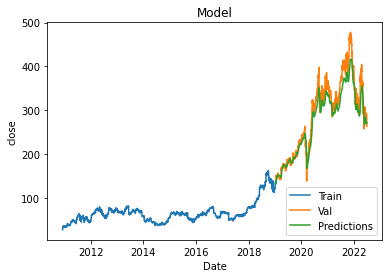

In [13]:
train = lulu_df[:training_data_len]

valid = lulu_df[training_data_len:]

valid['Predictions'] = predictions

plt.title('Model')

plt.xlabel('Date')

plt.ylabel('close')

plt.plot(train['close'])

plt.plot(valid[['close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

<AxesSubplot:xlabel='date'>

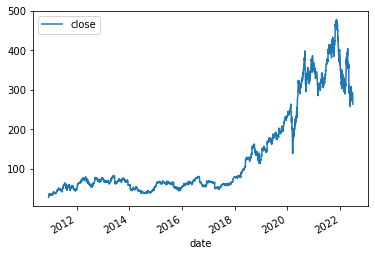

In [14]:
lulu_df.plot()

In [15]:
complete_lulu_df = pd.concat([train[['close']], valid[['close', 'Predictions']]])
complete_lulu_df

,close,Predictions
date,,
2010-12-06,27.629999,NaN
2010-12-07,27.465000,NaN
2010-12-08,27.850000,NaN
2010-12-09,31.780001,NaN
2010-12-10,34.349998,NaN
...,...,...
2022-06-27,287.480011,271.653870
2022-06-28,278.559998,271.951080
2022-06-29,282.980011,271.856079


In [18]:
lulu_df.to_csv("lulu_df.csv", index=False)

In [19]:
complete_lulu_df.to_csv("complete_lulu_df.csv", index=False)